In [14]:
import numpy as np
np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

In [15]:
def audio_model(input_shape):
    encoder = Input(shape = (None, 431))
    X, state_h, state_c = LSTM(128, return_state = True)(encoder)
    
    encoder_states = [state_h, state_c]
    

    # Set up the decoder, using `encoder_states` as initial state.
    decoder_inputs = Input(shape=(None, 34))
    
    # We set up our decoder to return full output sequences,
    # and to return internal states as well. We don't use the 
    # return states in the training model, but we will use them in inference.
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                         initial_state=encoder_states)
    X = Dense(34, activation='softmax')(decoder_outputs)
    
    model = Model(inputs = [encoder, decoder_inputs], outputs = X)
    
    return model

In [16]:
model = audio_model((3842, 13,431))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 431)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 34)     0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 128), (None, 286720      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 128),  83456       input_2[0][0]                    
                                     

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model1=model.fit([data2, f],
          l,validation_split=0.3,shuffle=True,
          batch_size=400,
          epochs=40)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 2689 samples, validate on 1153 samples
Epoch 1/40
2689/2689 [==============================] - 27s 10ms/step - loss: 1.8268 - acc: 0.0591 - val_loss: 1.8045 - val_acc: 0.0865
Epoch 2/40
2689/2689 [==============================] - 11s 4ms/step - loss: 1.6842 - acc: 0.0867 - val_loss: 1.6346 - val_acc: 0.0871
Epoch 3/40
2689/2689 [==============================] - 11s 4ms/step - loss: 1.5809 - acc: 0.0874 - val_loss: 1.5922 - val_acc: 0.0870
Epoch 4/40
2689/2689 [==============================] - 10s 4ms/step - loss: 1.5552 - acc: 0.0869 - val_loss: 1.5740 - val_acc: 0.0871
Epoch 5/40
2689/2689 [==============================] - 10s 4ms/step - loss: 1.5419 - acc: 0.0869 - val_loss: 1.5655 - val_acc: 0.0872
Epoch 6/40
2689/2689 [==============================] - 10s 4ms/step - loss: 1.5340 - acc: 0.0881 - val_loss: 1.5594 - val_acc: 0.0877
Epoch 7/40
2689

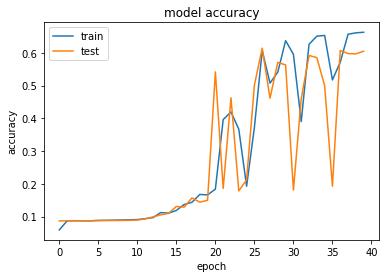

In [23]:
import matplotlib.pyplot as plt
plt.plot(model1.history['acc'])
plt.plot(model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

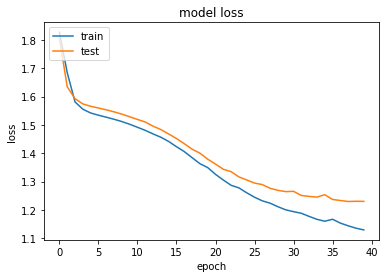

In [22]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model1=model.fit([data2, f],
          l,validation_split=0.4,shuffle=True,
          batch_size=400,
          epochs=40)

Train on 2305 samples, validate on 1537 samples
Epoch 1/40
2305/2305 [==============================] - 12s 5ms/step - loss: 1.1602 - acc: 0.4132 - val_loss: 1.2242 - val_acc: 0.6179
Epoch 2/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1407 - acc: 0.6290 - val_loss: 1.2091 - val_acc: 0.2346
Epoch 3/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1266 - acc: 0.2307 - val_loss: 1.2030 - val_acc: 0.1963
Epoch 4/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1181 - acc: 0.4255 - val_loss: 1.2024 - val_acc: 0.6024
Epoch 5/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1092 - acc: 0.6667 - val_loss: 1.2019 - val_acc: 0.6156
Epoch 6/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.1028 - acc: 0.6721 - val_loss: 1.2037 - val_acc: 0.6021
Epoch 7/40
2305/2305 [==============================] - 10s 4ms/step - loss: 1.0996 - acc: 0.6728 - val_loss: 1.2035 - val_acc: 0.5919
Epoch 8

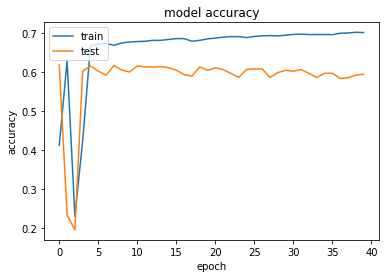

In [25]:
import matplotlib.pyplot as plt
plt.plot(model1.history['acc'])
plt.plot(model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

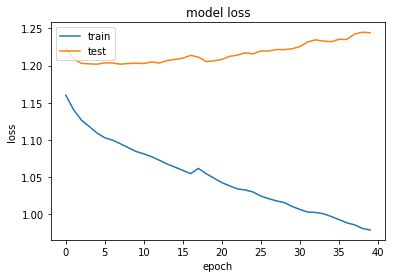

In [26]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()